In [1]:
# Import the Iris dataset from scikit-learn
from sklearn.datasets import load_iris
# Import our plotting module
import matplotlib.pyplot as plt
%matplotlib inline

/home/yungshun/.virtualenvs/yungshun-py3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/yungshun/.virtualenvs/yungshun-py3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/yungshun/.virtualenvs/yungshun-py3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/yungshun/.virtualenvs/yungshun-py3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Feature transformation algorithms are able to construct new features by selecting the best of all columns and combining this latent structure with a few brand new column. They can utilize small bits of information from all columns in every new super-column, so we do not need to create an inordinate amount of new columns to capture latent feature interactions. They never create more columns than we start with, and are still able to extract the latent structure that feature construction columns attempt to extract. 

# The Iris Dataset

In [2]:
# Load the Iris dataset
iris = load_iris()

In [3]:
# Separate the features and response variable
iris_X, iris_y = iris.data, iris.target

In [4]:
# The names of the flower we are trying to predict.
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
# Names of the features
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
# For labelling: {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
label_dict = {i: k for i, k in enumerate(iris.target_names)}

def plot(X, y, title, x_label, y_label):
    ax = plt.subplot(111)
    
    for label,marker,color in zip(
    range(3),('^', 's', 'o'),('blue', 'red', 'green')):
        plt.scatter(x=X[:,0].real[y == label],
            y=X[:,1].real[y == label],
            color=color,
            alpha=0.5,
            label=label_dict[label]
            )

    plt.xlabel(x_label)
    plt.ylabel(y_label)

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

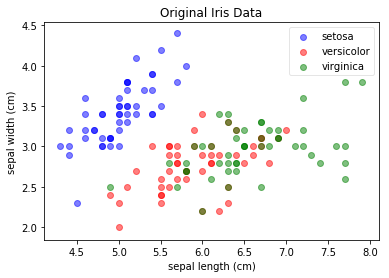

In [7]:
plot(iris_X, iris_y, "Original Iris Data", "sepal length (cm)", "sepal width (cm)")

## Principal Component Analysis (PCA)

PCA takes datasets that have several correlated features and projects them onto a coordinate (axis) system that has fewer correlated features. These new uncorrelated features (super-columns) are called <b>principal components</b>. They serve as an alternative coordinate system to the original feature space that requires fewer features and captures as much variance as possible. PCA is itself an <b>unsupervised</b> task, does not utilize a response column in order to make the transformation.